In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('yield_df.csv')
df.head(5)


,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [8]:
df.shape

(28242, 7)

In [9]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [11]:
df.duplicated().sum()

2310

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

# Transforming average_rain_fall_mm_per_year

In summary, this code identifies the indices of rows in the DataFrame df where the values in the column 'average_rain_fall_mm_per_year' are not numeric strings. These rows can be considered for removal or further processing, depending on the specific use case.

In [15]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True
to_drop = df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [16]:
df = df.drop(to_drop)

In [17]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [18]:
df['average_rain_fall_mm_per_year'] = df['average_rain_fall_mm_per_year'].astype(np.float64)

# Graph Frequency vs Area

<Axes: xlabel='count', ylabel='Area'>

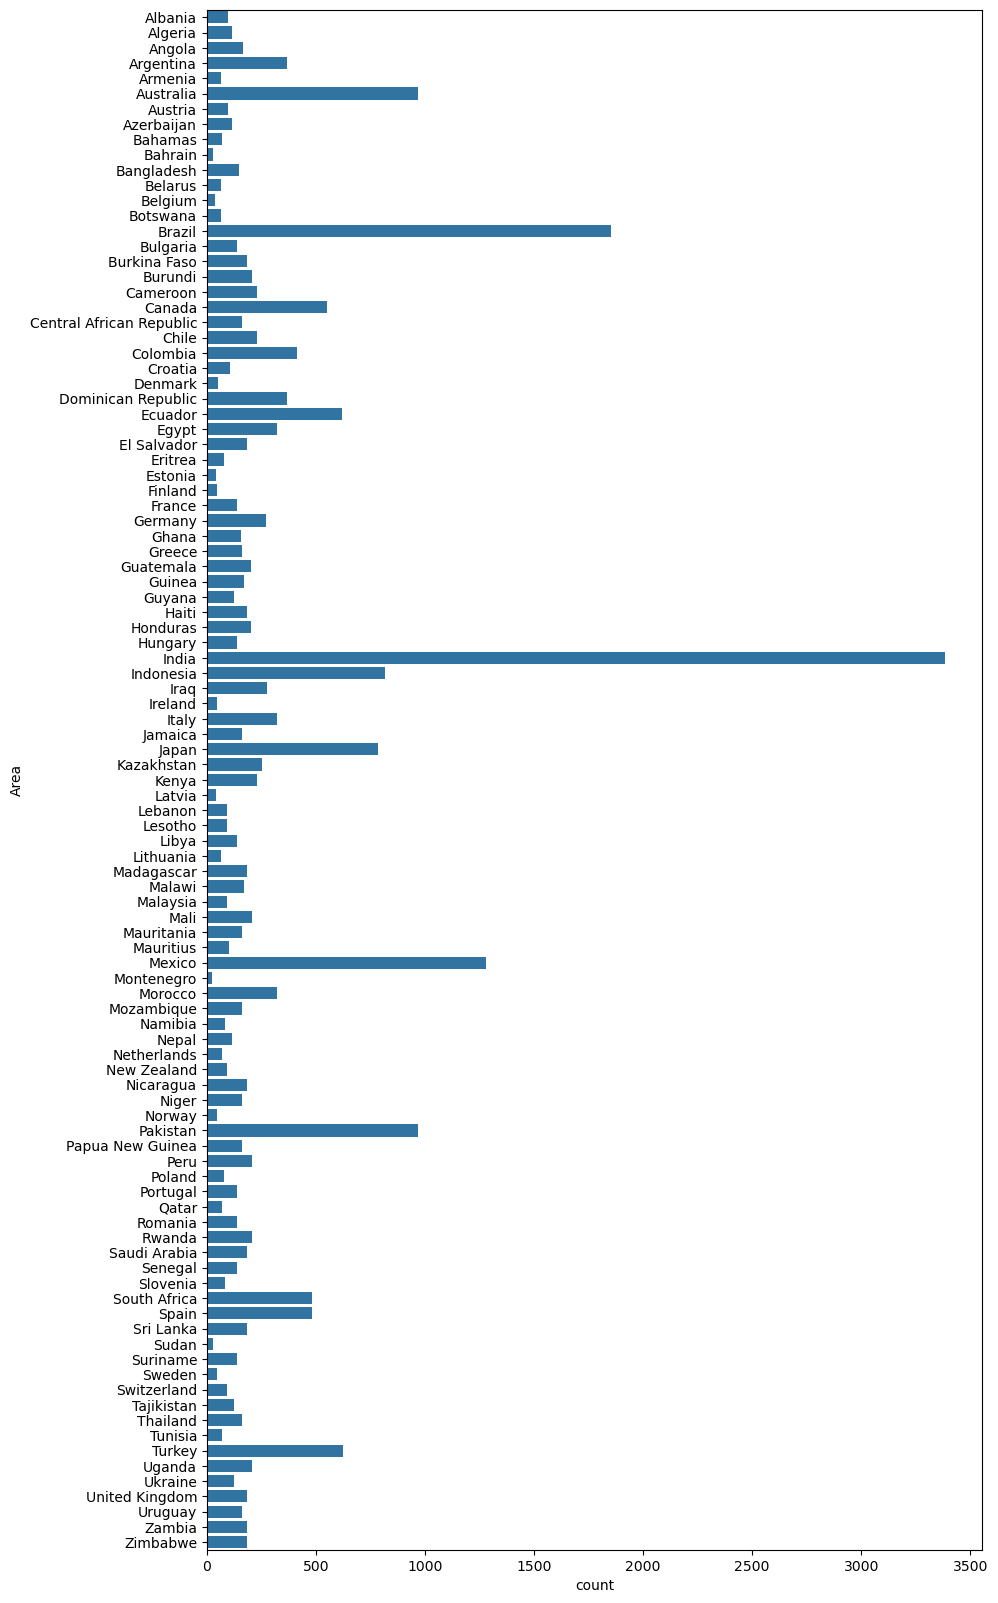

In [20]:
plt.figure(figsize=(10,20))
sns.countplot(y=df['Area'])

# yield_per_country

We have multiple columns for same country and we want the unique value of country with their total yield. So we need to do sum of all yields of each country to have total yield of a country.

In [22]:
# Total unique country
len(df['Area'].unique())

101

In [23]:
# Here we first get unique value of country and then all of their yield
country = df['Area'].unique()
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area']==state]['hg/ha_yield'].sum())

In [24]:
df['hg/ha_yield'].sum()

1996196943

In [25]:
yield_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 49264956,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 30999849,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,
 

# Yield Per Country Graph

<Axes: >

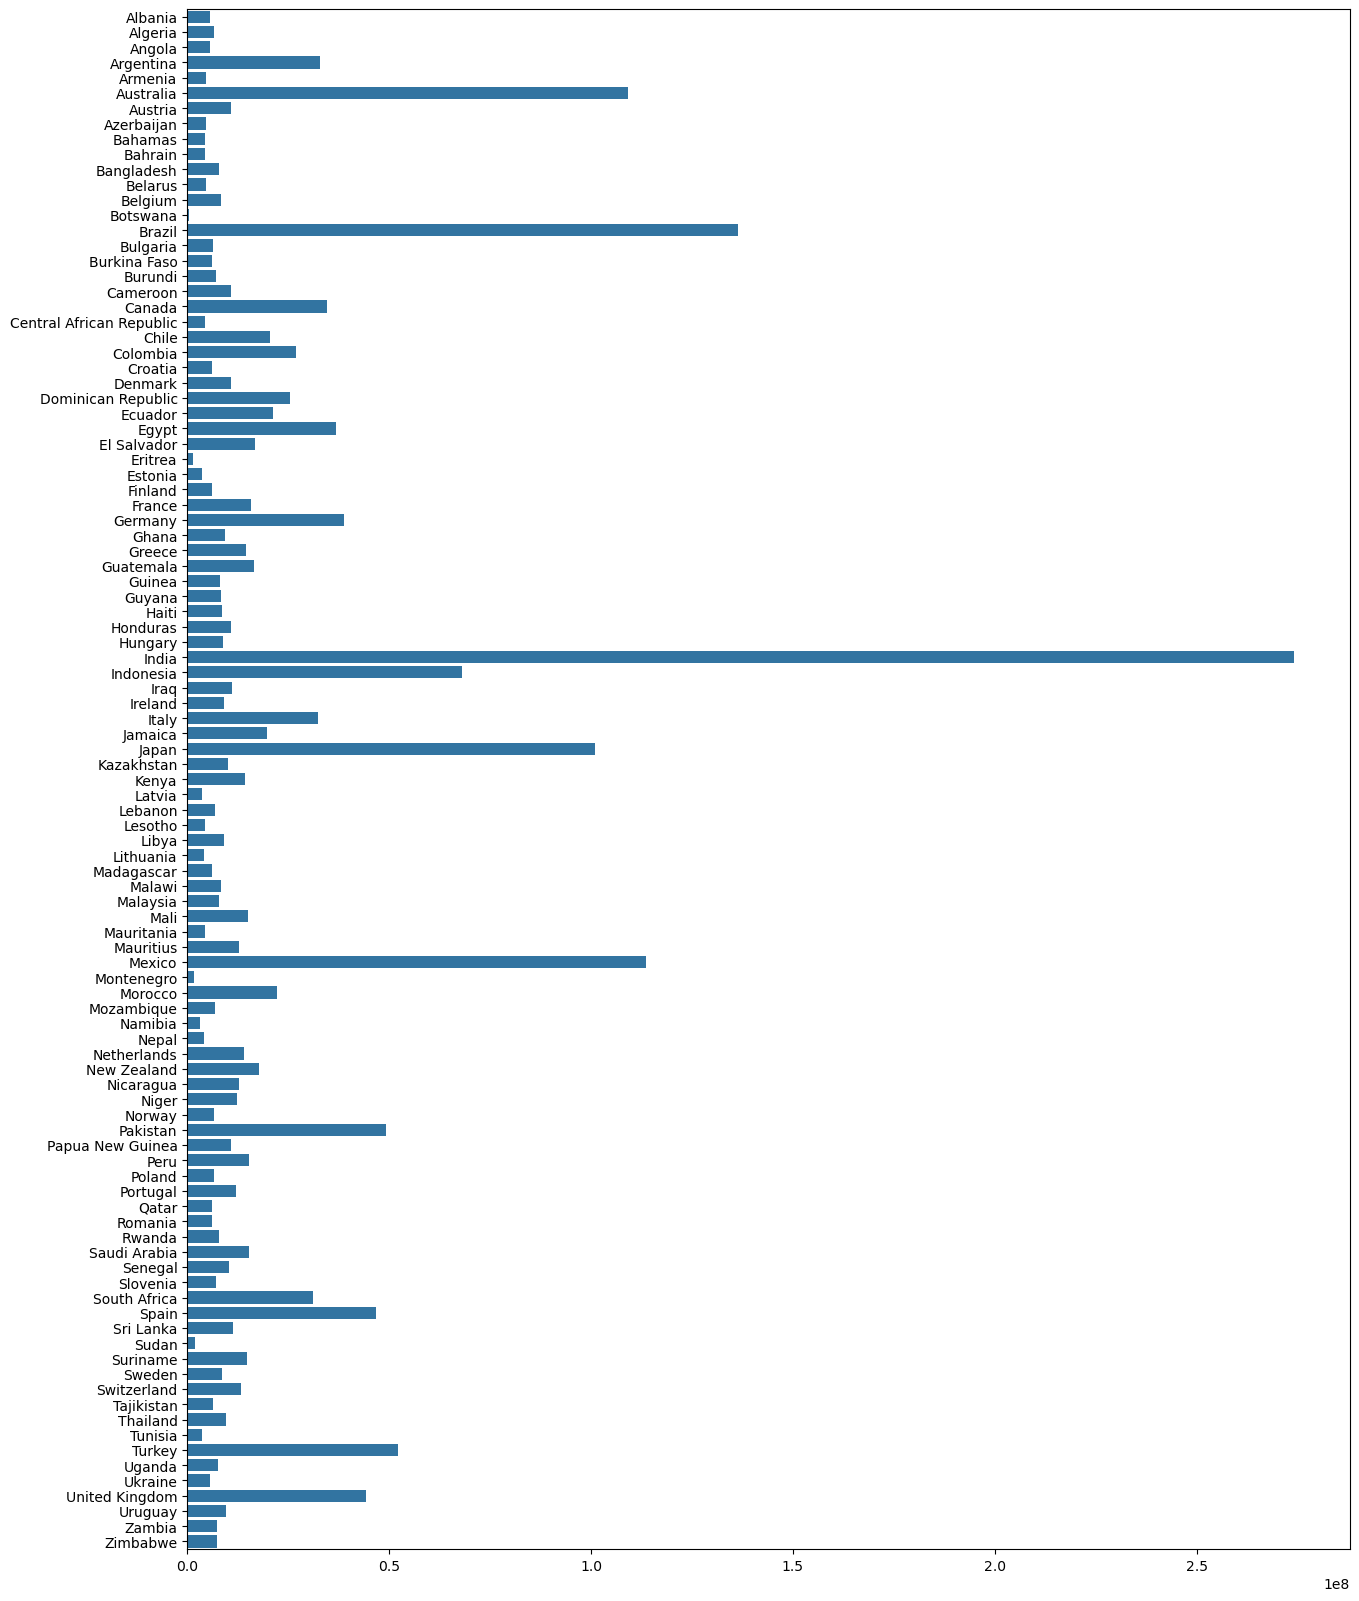

In [27]:
plt.figure(figsize=(15, 20))
sns.barplot(y=country, x=yield_per_country)

# Graph Frequency vs Item

<Axes: xlabel='count', ylabel='Item'>

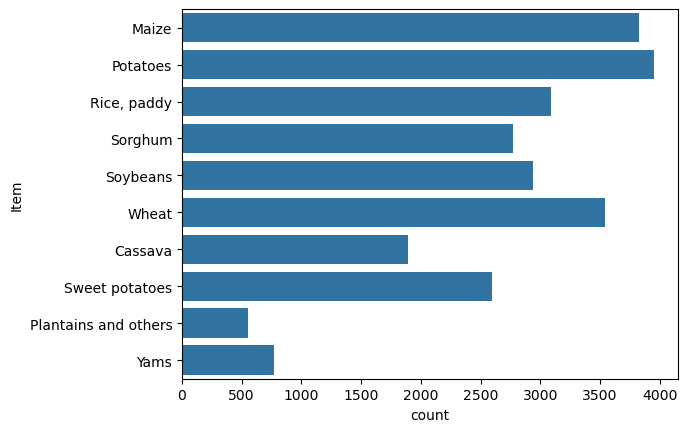

In [29]:
sns.countplot(y=df['Item'])

# Yield Vs Item

In [31]:
len(df['Item'].unique())

10

In [32]:
len(df['Item'])

25932

In [33]:
# We need to get yield of each crop
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item']==crop]['hg/ha_yield'].sum())

<Axes: >

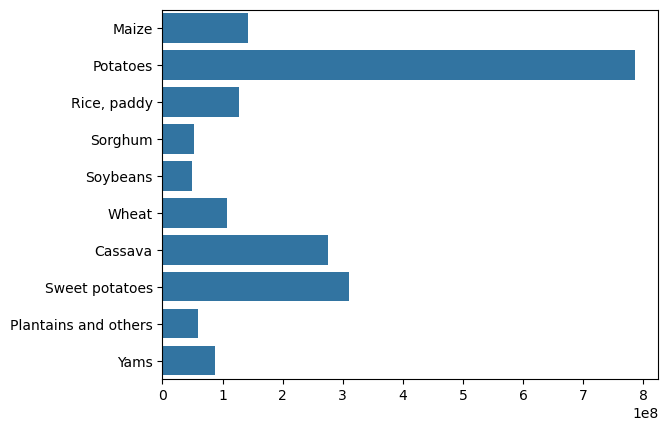

In [34]:
sns.barplot(y=crops,x=yield_per_crop)

# Train Test split Rearranging Columns

In [36]:
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [37]:
df.head(3)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

# Converting Categorical to Numerical and Scaling the values

In [40]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [0, 1, 2, 3]),
            ('OHE', ohe, [4, 5]),
        ],
        remainder='passthrough'
)

In [41]:
preprocesser

ColumnTransformer(remainder='passthrough',
                  transformers=[('StandardScale', StandardScaler(),
                                 [0, 1, 2, 3]),
                                ('OHE', OneHotEncoder(drop='first'), [4, 5])])

In [42]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

In [43]:
X_train_dummy

<20745x113 sparse matrix of type '<class 'numpy.float64'>'
	with 122865 stored elements in Compressed Sparse Row format>

# Let's train our model

In [45]:
#linear regression
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score


In [46]:
models = {
    'lr':LinearRegression(),
    'lss':Lasso(),
    'Rid':Ridge(),
    'Dtr':DecisionTreeRegressor()
}



for name, md in models.items():
    md.fit(X_train_dummy,y_train)
    y_pred = md.predict(X_test_dummy)
    
    print(f"{name} : mae : {mean_absolute_error(y_test,y_pred)} score : {r2_score(y_test,y_pred)}")

lr : mae : 29907.495068481403 score : 0.7473129122558679


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505228
  model = cd_fast.sparse_enet_coordinate_descent(


lss : mae : 29893.99762450549 score : 0.7473261756207235
Rid : mae : 29864.908068126577 score : 0.7473042446141962
Dtr : mae : 3975.957200694043 score : 0.9795218204472697


In [47]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

array([35286., 22814., 19295., ..., 11488., 34879., 79048.])

# Predictive System

In [49]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create an array of the input features
    features = np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]], dtype=object)

    # Transform the features using the preprocessor
    transformed_features = preprocesser.transform(features)

    # Make the prediction
    predicted_yield = dtr.predict(transformed_features).reshape(1, -1)

    return predicted_yield[0]


In [50]:
Year = 1990
average_rain_fall_mm_per_year =1485.0
pesticides_tonnes = 121.00
avg_temp = 16.37                   
Area = 'Albania'
Item = 'Maize'
result = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)
result

D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([36613.])

# Pickle Files

In [52]:
import pickle
pickle.dump(dtr,open('dtr.pkl','wb'))
pickle.dump(preprocesser,open('preprocessor.pkl','wb'))

In [53]:
import sklearn
print(sklearn.__version__)

1.4.2
